In [1]:
import numpy as np
from sklearn import datasets

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target 

x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
print(x.shape, y.shape)

torch.Size([150, 4]) torch.Size([150])


In [3]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
np.unique(Y)

array([0, 1, 2])

In [5]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=4, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=3),
)

ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [6]:
kl_weight = 0.1

for step in range(3000):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

- Accuracy: 98.000000 %
- CE : 0.09, KL : 1.29


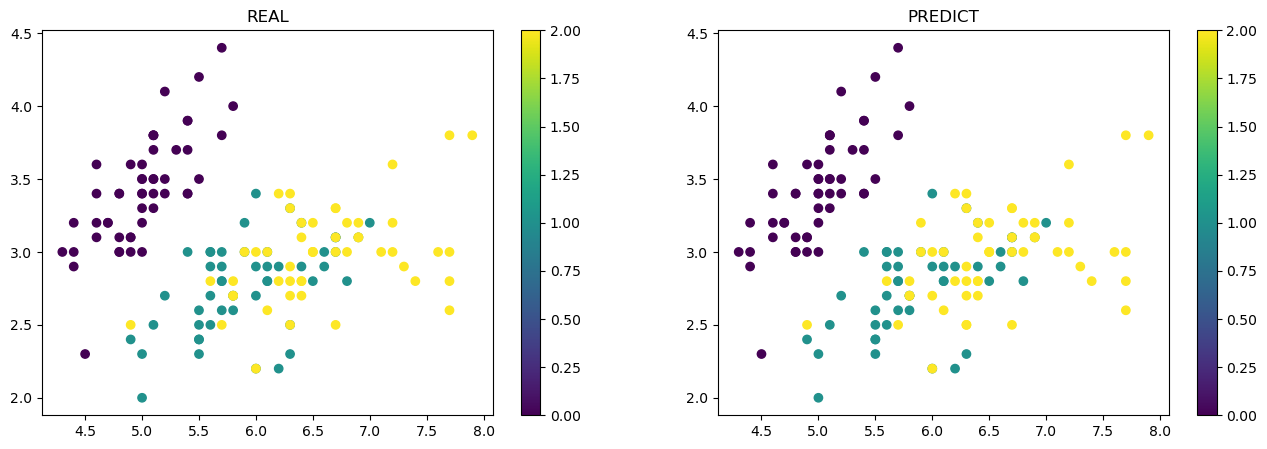

In [7]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp

In [8]:
FEATURE_NAMES = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
]

hidden_units = [8, 8]
learning_rate = 0.001


def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        inputs[feature_name] = layers.Input(
            name=feature_name, shape=(1,), dtype=tf.float32
        )
    return inputs

def get_train_and_test_splits(train_size, batch_size=1):
    # We prefetch with a buffer the same size as the dataset because th dataset
    # is very small and fits into memory.
    dataset = (
        tfds.load(name="wine_quality", as_supervised=True, split="train")
        .map(lambda x, y: (x, tf.cast(y, tf.float32)))
        .prefetch(buffer_size=dataset_size)
        .cache()
    )
    # We shuffle with a buffer the same size as the dataset.
    train_dataset = (
        dataset.take(train_size).shuffle(buffer_size=train_size).batch(batch_size)
    )
    test_dataset = dataset.skip(train_size).batch(batch_size)

    return train_dataset, test_dataset

def run_experiment(model, loss, train_dataset, test_dataset):

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=loss,
        metrics=[keras.metrics.RootMeanSquaredError()],
    )

    print("Start training the model...")
    model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)
    print("Model training finished.")
    _, rmse = model.evaluate(train_dataset, verbose=0)
    print(f"Train RMSE: {round(rmse, 3)}")

    print("Evaluating model performance...")
    _, rmse = model.evaluate(test_dataset, verbose=0)
    print(f"Test RMSE: {round(rmse, 3)}")

In [9]:
dataset_size = 4898
batch_size = 256
num_epochs = 100
sample = 10
train_size = int(dataset_size * 0.85)

mse_loss = keras.losses.MeanSquaredError()

# Split the datasets into two groups
train_dataset, test_dataset = get_train_and_test_splits(train_size, batch_size)

# Sample some example targets from the test dataset
examples, targets = list(test_dataset.unbatch().shuffle(batch_size * 10).batch(sample))[
    0
]


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [10]:
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model

def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

In [11]:
def create_bnn_model(train_size):
    inputs = create_model_inputs()
    features = keras.layers.concatenate(list(inputs.values()))
    features = layers.BatchNormalization()(features)

    # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)

    # The output is deterministic: a single point estimate.
    outputs = layers.Dense(units=1)(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

def compute_predictions(model, iterations=100):
    predicted = []
    for _ in range(iterations):
        predicted.append(model(examples).numpy())
    predicted = np.concatenate(predicted, axis=1)

    prediction_mean = np.mean(predicted, axis=1).tolist()
    prediction_min = np.min(predicted, axis=1).tolist()
    prediction_max = np.max(predicted, axis=1).tolist()
    prediction_range = (np.max(predicted, axis=1) - np.min(predicted, axis=1)).tolist()

    for idx in range(sample):
        print(
            f"Predictions mean: {round(prediction_mean[idx], 2)}, "
            f"min: {round(prediction_min[idx], 2)}, "
            f"max: {round(prediction_max[idx], 2)}, "
            f"range: {round(prediction_range[idx], 2)} - "
            f"Actual: {targets[idx]}"
        )


In [12]:
num_epochs = 500
bnn_model_full = create_bnn_model(train_size)
run_experiment(bnn_model_full, mse_loss, train_dataset, test_dataset)

compute_predictions(bnn_model_full)

Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


Start training the model...
Epoch 1/500
17/17 [==============================] - 2s 32ms/step - loss: 19.7088 - root_mean_squared_error: 4.4390 - val_loss: 17.2655 - val_root_mean_squared_error: 4.1546
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 17.0238 - root_mean_squared_error: 4.1255 - val_loss: 17.8631 - val_root_mean_squared_error: 4.2259
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 16.9426 - root_mean_squared_error: 4.1155 - val_loss: 19.7007 - val_root_mean_squared_error: 4.4382
Epoch 4/500
17/17 [==============================] - 0s 3ms/step - loss: 15.1652 - root_mean_squared_error: 3.8937 - val_loss: 13.9352 - val_root_mean_squared_error: 3.7325
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 13.4564 - root_mean_squared_error: 3.6676 - val_loss: 13.0139 - val_root_mean_squared_error: 3.6067
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 12.5188 - root_mean_squared_error

Epoch 96/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6584 - root_mean_squared_error: 0.8057 - val_loss: 0.6711 - val_root_mean_squared_error: 0.8128
Epoch 97/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6574 - root_mean_squared_error: 0.8049 - val_loss: 0.6515 - val_root_mean_squared_error: 0.8015
Epoch 98/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6534 - root_mean_squared_error: 0.8019 - val_loss: 0.6640 - val_root_mean_squared_error: 0.8090
Epoch 99/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6739 - root_mean_squared_error: 0.8143 - val_loss: 0.6133 - val_root_mean_squared_error: 0.7764
Epoch 100/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6640 - root_mean_squared_error: 0.8088 - val_loss: 0.6297 - val_root_mean_squared_error: 0.7866
Epoch 101/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6573 - root_mean_squared_error: 0.8042 - val_loss: 0.6728 - va

17/17 [==============================] - 0s 2ms/step - loss: 0.6218 - root_mean_squared_error: 0.7809 - val_loss: 0.5990 - val_root_mean_squared_error: 0.7650
Epoch 191/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6178 - root_mean_squared_error: 0.7780 - val_loss: 0.6147 - val_root_mean_squared_error: 0.7760
Epoch 192/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6200 - root_mean_squared_error: 0.7797 - val_loss: 0.6493 - val_root_mean_squared_error: 0.7981
Epoch 193/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6229 - root_mean_squared_error: 0.7820 - val_loss: 0.6370 - val_root_mean_squared_error: 0.7907
Epoch 194/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6123 - root_mean_squared_error: 0.7745 - val_loss: 0.6401 - val_root_mean_squared_error: 0.7921
Epoch 195/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6308 - root_mean_squared_error: 0.7866 - val_loss: 0.6185 - val_root_mea

17/17 [==============================] - 0s 2ms/step - loss: 0.6137 - root_mean_squared_error: 0.7750 - val_loss: 0.6020 - val_root_mean_squared_error: 0.7667
Epoch 285/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6221 - root_mean_squared_error: 0.7803 - val_loss: 0.5837 - val_root_mean_squared_error: 0.7552
Epoch 286/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6060 - root_mean_squared_error: 0.7701 - val_loss: 0.6206 - val_root_mean_squared_error: 0.7791
Epoch 287/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6226 - root_mean_squared_error: 0.7804 - val_loss: 0.6048 - val_root_mean_squared_error: 0.7689
Epoch 288/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6209 - root_mean_squared_error: 0.7792 - val_loss: 0.5856 - val_root_mean_squared_error: 0.7566
Epoch 289/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6084 - root_mean_squared_error: 0.7713 - val_loss: 0.5957 - val_root_mea

17/17 [==============================] - 0s 2ms/step - loss: 0.6061 - root_mean_squared_error: 0.7694 - val_loss: 0.5981 - val_root_mean_squared_error: 0.7642
Epoch 379/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6057 - root_mean_squared_error: 0.7689 - val_loss: 0.5988 - val_root_mean_squared_error: 0.7648
Epoch 380/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6027 - root_mean_squared_error: 0.7670 - val_loss: 0.6091 - val_root_mean_squared_error: 0.7700
Epoch 381/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5983 - root_mean_squared_error: 0.7645 - val_loss: 0.5860 - val_root_mean_squared_error: 0.7557
Epoch 382/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6124 - root_mean_squared_error: 0.7734 - val_loss: 0.6124 - val_root_mean_squared_error: 0.7733
Epoch 383/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5962 - root_mean_squared_error: 0.7631 - val_loss: 0.6013 - val_root_mea

17/17 [==============================] - 0s 3ms/step - loss: 0.6175 - root_mean_squared_error: 0.7759 - val_loss: 0.6204 - val_root_mean_squared_error: 0.7784
Epoch 473/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6024 - root_mean_squared_error: 0.7665 - val_loss: 0.5948 - val_root_mean_squared_error: 0.7623
Epoch 474/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5927 - root_mean_squared_error: 0.7603 - val_loss: 0.6098 - val_root_mean_squared_error: 0.7713
Epoch 475/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6203 - root_mean_squared_error: 0.7780 - val_loss: 0.5994 - val_root_mean_squared_error: 0.7646
Epoch 476/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5968 - root_mean_squared_error: 0.7627 - val_loss: 0.6093 - val_root_mean_squared_error: 0.7721
Epoch 477/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5912 - root_mean_squared_error: 0.7590 - val_loss: 0.5790 - val_root_mea

In [13]:
train_dataset

<BatchDataset element_spec=({'alcohol': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(None,), dtype=tf.float32, name=None)}, TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [14]:
train_size

4163

In [16]:
examples

{'alcohol': <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([10.2,  9.5, 10.5, 12.4, 10.4, 12.2, 10. , 11.7,  9.1, 10.1],
       dtype=float32)>,
 'chlorides': <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.045, 0.041, 0.041, 0.036, 0.046, 0.041, 0.038, 0.029, 0.049,
        0.056], dtype=float32)>,
 'citric acid': <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.31, 0.26, 0.32, 0.3 , 0.22, 0.49, 0.39, 0.3 , 0.53, 0.22],
       dtype=float32)>,
 'density': <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([0.99546, 0.9941 , 0.99173, 0.99037, 0.9929 , 0.9926 , 0.99725,
        0.98883, 0.99792, 0.9947 ], dtype=float32)>,
 'fixed acidity': <tf.Tensor: shape=(10,), dtype=float32, numpy=array([6.4, 6.5, 6.7, 6.4, 6.3, 7.1, 6.7, 5.7, 7.9, 7.3], dtype=float32)>,
 'free sulfur dioxide': <tf.Tensor: shape=(10,), dtype=float32, numpy=array([55., 40., 26., 25., 31., 28., 60., 24., 63., 44.], dtype=float32)>,
 'pH': <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array

In [17]:
targets

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([5., 6., 7., 7., 6., 8., 7., 6., 5., 6.], dtype=float32)>

In [1]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt

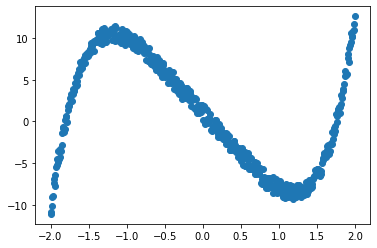

In [2]:
x = torch.linspace(-2, 2, 500)
y = x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [5]:
def clean_target(x):
    return x.pow(5) -10* x.pow(1)+1
def target(x):
    return x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())

#https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825

In [6]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
)

In [7]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [8]:
for step in range(2000):
    pre = model(x)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))

- MSE : 1.12, KL : 11.03


In [9]:
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

In [10]:
models_result = np.array([model(x_test).data.numpy() for k in range(10000)])
models_result = models_result[:,:,0]    
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

Text(0, 0.5, 'y')

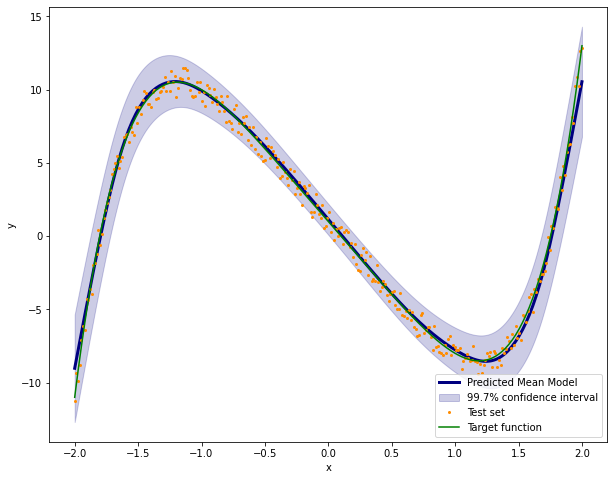

In [11]:
plt.figure(figsize=(10,8))
plt.plot(x_test.data.numpy(),mean_values,color='navy',lw=3,label='Predicted Mean Model')
plt.fill_between(x_test.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x_test.data.numpy(),y_test.data.numpy(),'.',color='darkorange',markersize=4,label='Test set')
plt.plot(x_test.data.numpy(),clean_target(x_test).data.numpy(),color='green',markersize=4,label='Target function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')